# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

#### Importing relevant libraries:

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#### Importing the dataset:

In [2]:
house = pd.read_csv("../data/boston_data.csv")

#### Data cleaning:

In [3]:
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town.\
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per 10000 Dollars \
PTRATIO - pupil-teacher ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT - Perc. lower status of the population\
MEDV - Median value of owner-occupied homes in $1000's\

In [4]:
house.shape

(404, 14)

In [5]:
house.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [7]:
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [8]:
house.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

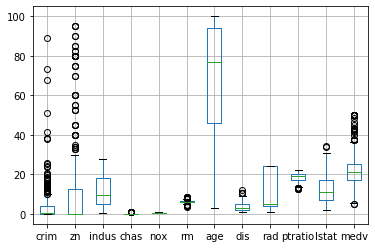

In [9]:
house.boxplot(column=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'ptratio', 'lstat', 'medv'])

#### Dropping chas for a while to work with the z value:

In [10]:
house_clean = house.drop(columns="chas")

In [16]:
chas = house[["chas"]]

#### Using z value and taking out all values that are more than 3 std dev further than the mean:

In [11]:
house_clean = house_clean[(np.abs(stats.zscore(house_clean))<3).all(axis=1)]

In [12]:
house_clean.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2.450686,7.226744,11.111017,0.554299,6.258157,68.745058,3.754371,9.026163,395.613372,18.472384,372.805756,12.605669,21.870349
std,4.615743,15.207775,6.614872,0.115187,0.569417,27.481065,1.862511,8.305530,164.333352,2.043084,56.255129,6.433283,7.049946
min,0.006320,0.000000,1.250000,0.400000,4.368000,2.900000,1.316300,1.000000,188.000000,13.000000,81.330000,1.980000,5.600000
25%,0.086420,0.000000,5.860000,0.459500,5.890500,47.900000,2.197850,4.000000,279.000000,17.400000,378.000000,7.537500,17.800000
50%,0.223505,0.000000,8.560000,0.524000,6.215500,74.950000,3.346000,5.000000,311.000000,18.850000,392.110000,11.395000,21.400000
75%,2.447392,0.000000,18.100000,0.614000,6.563500,94.025000,4.978850,8.000000,437.000000,20.200000,396.352500,16.312500,24.700000
max,25.940600,75.000000,27.740000,0.871000,8.266000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,48.300000


#### Inserting chas column back as we're finished with the z value:

In [18]:
house_clean = house_clean.merge(chas, how="left", left_index=True, right_index=True)

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [19]:
house_corr = house_clean.corr()
house_corr 

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas
crim,1.000000,-0.241617,0.519042,0.539734,-0.196427,0.429104,-0.478279,0.807828,0.750732,0.344527,-0.318274,0.550421,-0.502947,-0.062474
zn,-0.241617,1.000000,-0.466889,-0.437479,0.306047,-0.464761,0.560230,-0.244831,-0.266434,-0.319875,0.149975,-0.372182,0.352506,-0.035419
indus,0.519042,-0.466889,1.000000,0.726526,-0.374101,0.563808,-0.664603,0.556748,0.699719,0.285846,-0.332185,0.600200,-0.568853,0.043215
nox,0.539734,-0.437479,0.726526,1.000000,-0.292704,0.690241,-0.754815,0.553194,0.629006,0.063767,-0.367085,0.565860,-0.476195,0.107571
rm,-0.196427,0.306047,-0.374101,-0.292704,1.000000,-0.204997,0.201644,-0.106398,-0.208291,-0.203162,0.107481,-0.617776,0.718521,-0.000627
age,0.429104,-0.464761,0.563808,0.690241,-0.204997,1.000000,-0.699228,0.396756,0.461743,0.166223,-0.229832,0.602130,-0.457426,0.079676
dis,-0.478279,0.560230,-0.664603,-0.754815,0.201644,-0.699228,1.000000,-0.444762,-0.512869,-0.146633,0.271713,-0.490925,0.321378,-0.092416
rad,0.807828,-0.244831,0.556748,0.553194,-0.106398,0.396756,-0.444762,1.000000,0.902754,0.431874,-0.297313,0.438318,-0.420190,-0.042943
tax,0.750732,-0.266434,0.699719,0.629006,-0.208291,0.461743,-0.512869,0.902754,1.000000,0.419522,-0.327819,0.511240,-0.535423,-0.066463
ptratio,0.344527,-0.319875,0.285846,0.063767,-0.203162,0.166223,-0.146633,0.431874,0.419522,1.000000,-0.042575,0.271045,-0.441173,-0.137852


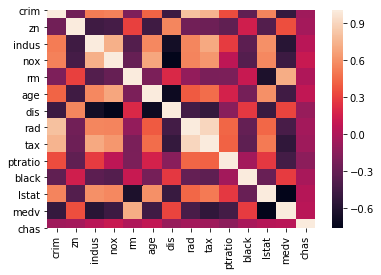

In [20]:
sns.heatmap(house_corr)

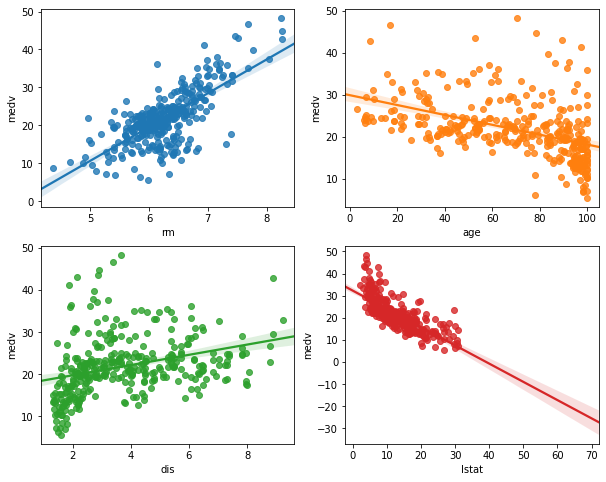

In [24]:
f, axes = plt.subplots(2, 2)
f.set_size_inches(10, 8)
sns.regplot(x="rm", y="medv", data=house_clean, ax=axes[0, 0])
sns.regplot(x="age", y="medv", data=house_clean, ax=axes[0, 1])
sns.regplot(x="dis", y="medv", data=house_clean, ax=axes[1, 0])
sns.regplot(x="lstat", y="medv", data=house_clean, ax=axes[1, 1])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

RM - MEDV: More rooms in the house, more expensive the house \
AGE - MEDV: The older the appartement unit, the cheaper the house \
DIS - MEDV: Higher distance to employment centres, more expensive the house \
LSTAT - MEDV: the higher the % of low status, the cheaper the house 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [26]:
house_clean.medv.describe()

count    344.000000
mean      21.870349
std        7.049946
min        5.600000
25%       17.800000
50%       21.400000
75%       24.700000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [29]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = house_clean.drop("medv", axis=1)
y = house_clean.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model_2 = RandomForestRegressor(max_depth=2)
rf_model_4 = RandomForestRegressor(max_depth=4)
rf_model_6 = RandomForestRegressor(max_depth=6)
rf_model_8 = RandomForestRegressor(max_depth=8)
rf_model_10 = RandomForestRegressor(max_depth=10)

In [35]:
rf_model_2.fit(X_train, y_train)
rf_model_4.fit(X_train, y_train)
rf_model_6.fit(X_train, y_train)
rf_model_8.fit(X_train, y_train)
rf_model_10.fit(X_train, y_trainrf_model_2)

c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
rf2_pred = rf_model_2.predict(X_test)
rf4_pred = rf_model_4.predict(X_test)
rf6_pred = rf_model_6.predict(X_test)
rf8_pred = rf_model_8.predict(X_test)
rf10_pred = rf_model_10.predict(X_test)
'''
pred_test_lst = []
for i in lst:
    pred_test_lst.append(i.predict(X_test))
print (pred_test_lst)'''

'\npred_test_lst = []\nfor i in lst:\n    pred_test_lst.append(i.predict(X_test))\nprint (pred_test_lst)'

In [50]:
print(r2_score(y_test, rf2_pred))
print(r2_score(y_test, rf4_pred))
print(r2_score(y_test, rf6_pred))
print(r2_score(y_test, rf8_pred))
print(r2_score(y_test, rf10_pred))

0.684648583496385
0.7768845398910245
0.7981041107948064
0.7722553228087388
0.7995238114949889


Now, plot the score for each tree on the training set and on the testing set.

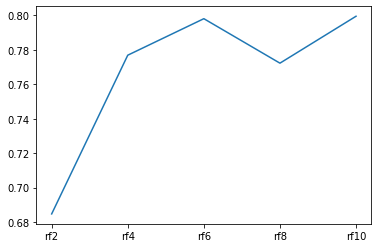

In [51]:
# Produce a plot with the score for the testing and training for the different max depths
plt.plot(["rf2","rf4","rf6", "rf8", "rf10"], [0.684648583496385, 0.7768845398910245, 0.7981041107948064, 0.7722553228087388, 0.7995238114949889])

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here